# Representación_mapas_FrecuenciaRelativa_PlateCarree_Para-Todas-Las-Clases.py

#### Con este programa representamos con mapas de color cartográficos la frecuencia relativa (calculada a partir de todo el periodo temporal) de cada clase en todos los puntos de las latitudes medias del hemisferio norte y guardamos la imagen obtenida para cada clase

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

#### Abrimos el archivo con el pvalor, el slope y la freq_relativa y sacamos los Datarray de cada uno. Además reordenamos los valores de las longitudes para que los que se queden a la izquierda del Meridiano de Greenwich sean negativos y aparezcan ordenadas de menor a mayor (con el correspondiente reordenamiento de los datos asociados a cada longitud)

In [3]:
DatosEntrada="C:\\Users\\Usuario\\Desktop\\Practicas Meteogalicia\\Datos de salida\\pvalor_slope_freqrelativa\\Anual_pvalor_slope_freqrelativa.nc"
Tipos=['PA', 'DANE', 'DAE', 'DASE', 'DAS', 'DASW', 'DAW', 'DANW', 'DAN', 'PDNE', 'PDE', 'PDSE', 'PDS', 'PDSW', 'PDW', 'PDNW', 'PDN', 'PC', 'DCNE', 'DCE', 'DCSE', 'DCS', 'DCSW', 'DCW', 'DCNW', 'DCN', 'U']
labelperiodotemporal='Anual'
datos=xr.open_dataset(DatosEntrada)
poslon180grados=np.argwhere(datos.lon.values==180)[0][0]
datos.lon.values[poslon180grados:]=datos.lon.values[poslon180grados:]-360
datos_pvalor=datos.pvalor #DataArray
datos_slope=datos.slope #DataArray
datos_freq_relativa=datos.freq_relativa #DataArray
datos_clase=datos.Clase #DataArray
dimwt=len(datos_clase)
for i in range(0,dimwt):
    for j in range(len(datos.lat.values)):
        a=np.array(datos.freq_relativa.values[j,:72,i])
        b=np.array(datos.freq_relativa.values[j,72:,i])
        datos.freq_relativa.values[j,:72,i]=np.array(b)
        datos.freq_relativa.values[j,72:,i]=np.array(a)
        
        c=np.array(datos.slope.values[j,:72,i])
        d=np.array(datos.slope.values[j,72:,i])
        datos.slope.values[j,:72,i]=np.array(d)
        datos.slope.values[j,72:,i]=np.array(c)
        
        e=np.array(datos.pvalor.values[j,:72,i])
        f=np.array(datos.pvalor.values[j,72:,i])
        datos.pvalor.values[j,:72,i]=np.array(f)
        datos.pvalor.values[j,72:,i]=np.array(e)

a=np.array(datos.lon.values[72:])
b=np.array(datos.lon.values[:72])
datos.lon.values[72:]=np.array(b)
datos.lon.values[:72]=np.array(a)

#### Pongo los limites en longitud y latitud que va a tener mi proyección (en mi caso las latitudes medias del hemisferio norte)

In [4]:
extent = [-180, 180, 30, 70]
lon = np.sort(datos.lon.values)
lat = datos.lat.values

#### Dibujo mapas cartográfico de color de las latitudes medias del hemisferio norte para representar la frecuencia relativa en dichos puntos y para cada clase, guardando la imagen correspondiente a cada clase

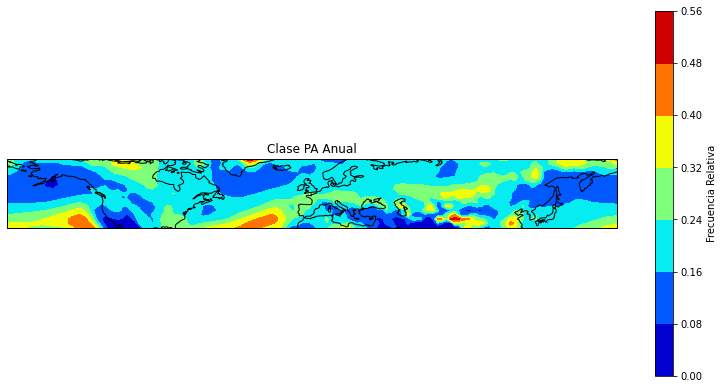

<Figure size 432x288 with 0 Axes>

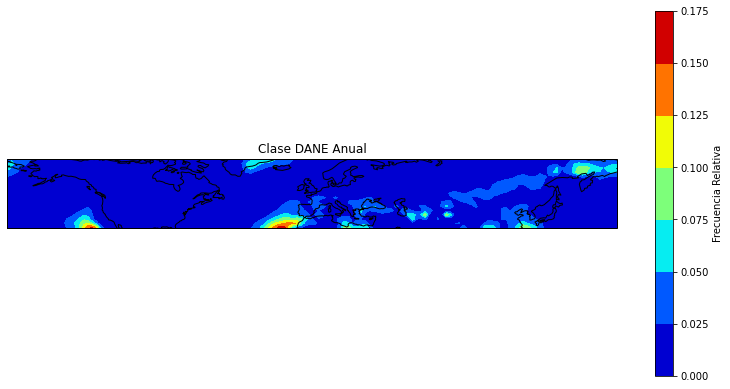

<Figure size 432x288 with 0 Axes>

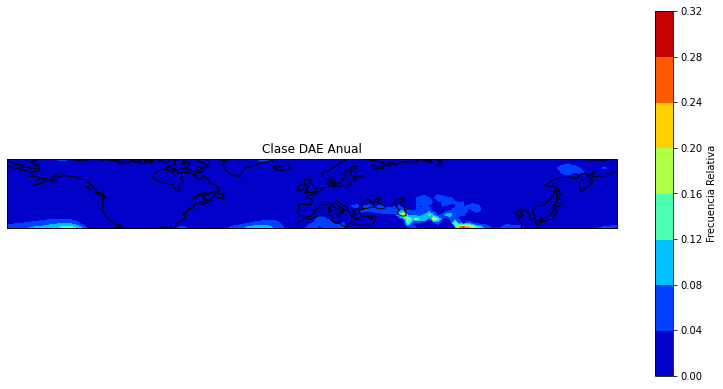

<Figure size 432x288 with 0 Axes>

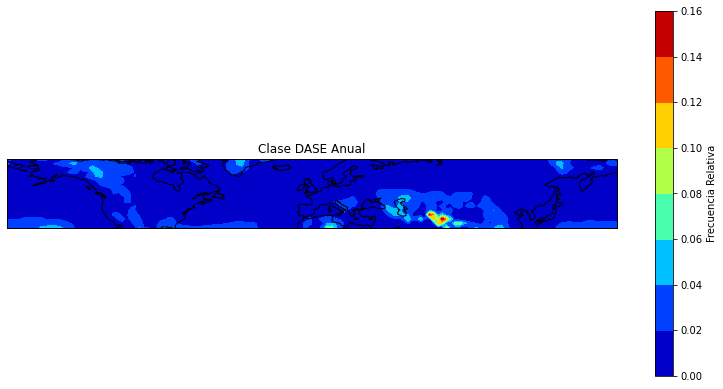

<Figure size 432x288 with 0 Axes>

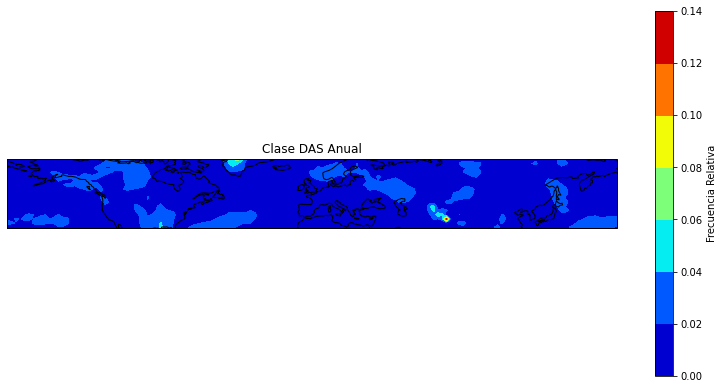

<Figure size 432x288 with 0 Axes>

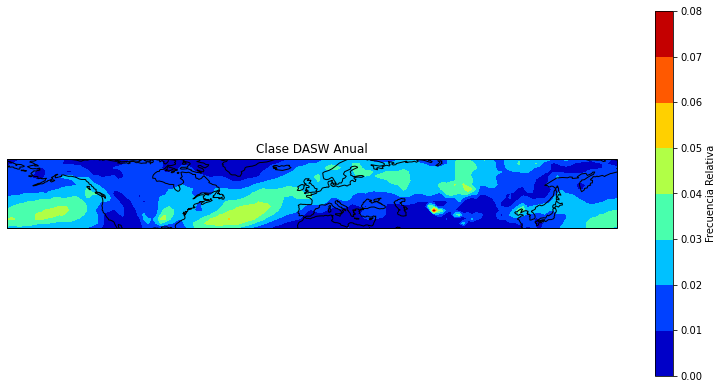

<Figure size 432x288 with 0 Axes>

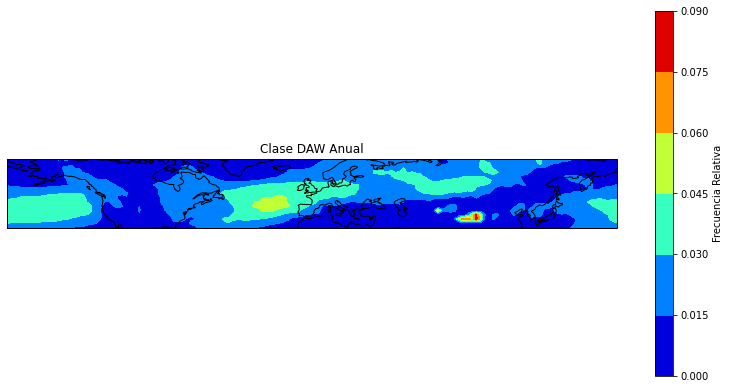

<Figure size 432x288 with 0 Axes>

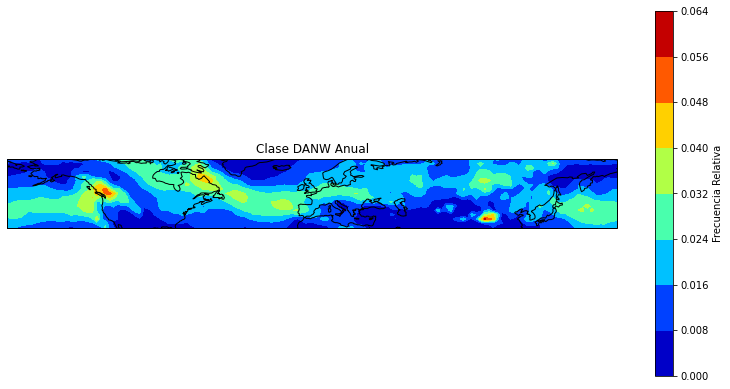

<Figure size 432x288 with 0 Axes>

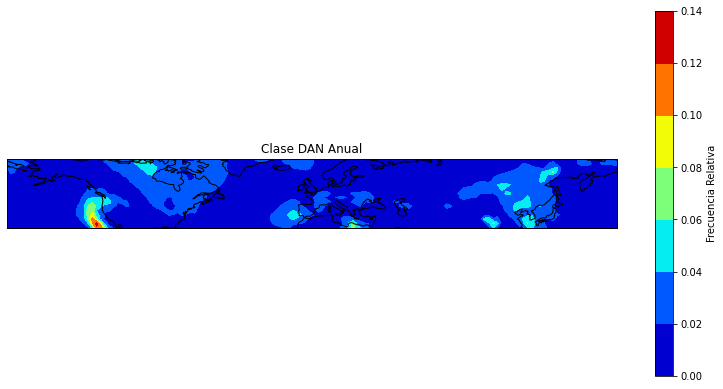

<Figure size 432x288 with 0 Axes>

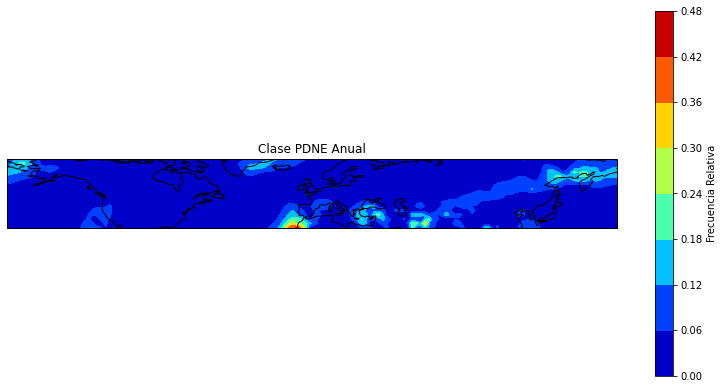

<Figure size 432x288 with 0 Axes>

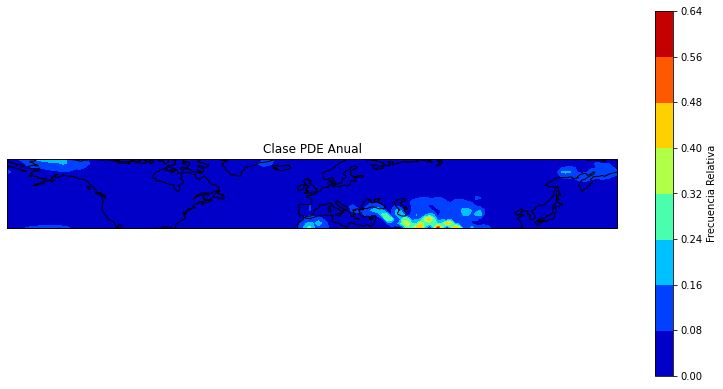

<Figure size 432x288 with 0 Axes>

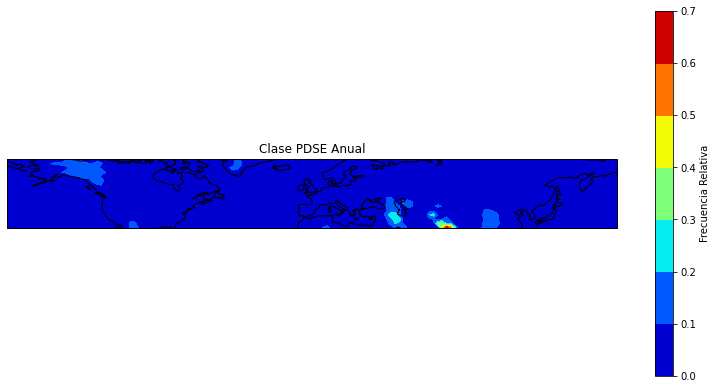

<Figure size 432x288 with 0 Axes>

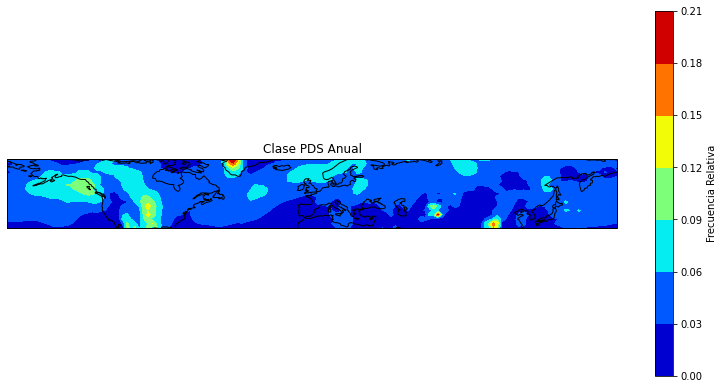

<Figure size 432x288 with 0 Axes>

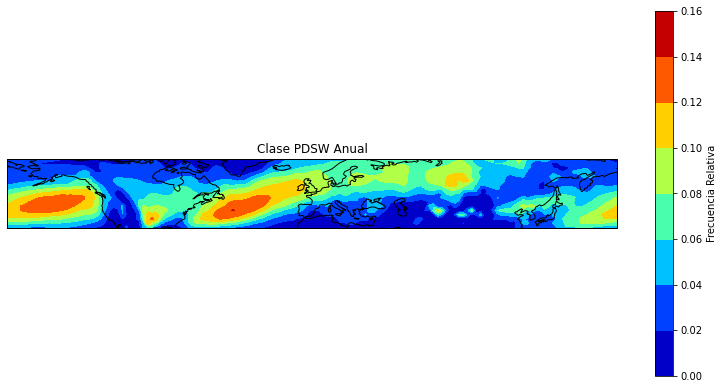

<Figure size 432x288 with 0 Axes>

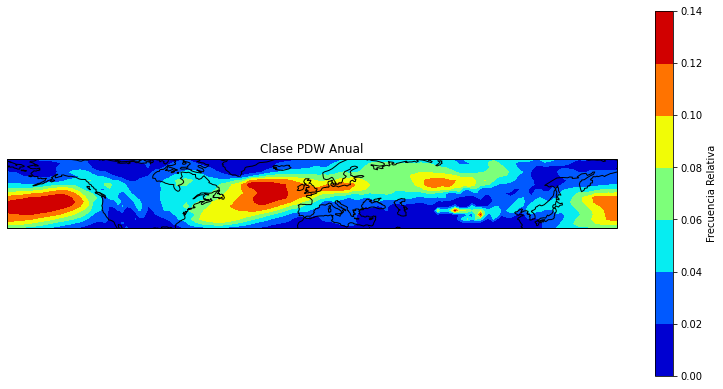

<Figure size 432x288 with 0 Axes>

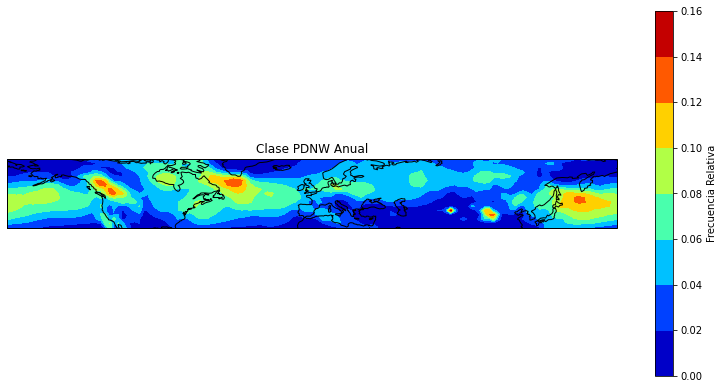

<Figure size 432x288 with 0 Axes>

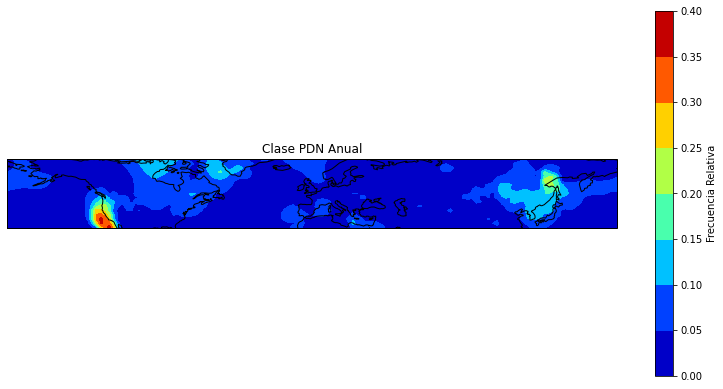

<Figure size 432x288 with 0 Axes>

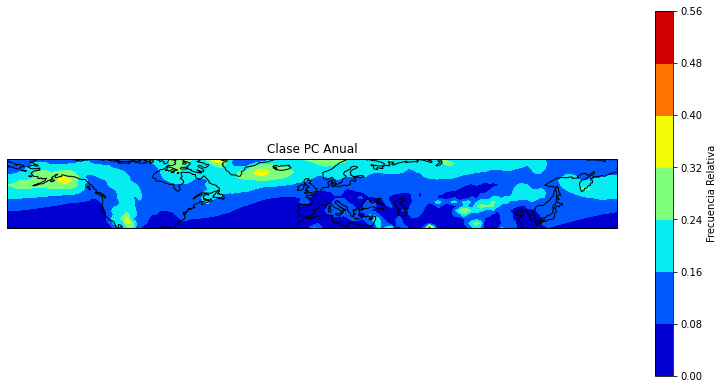

<Figure size 432x288 with 0 Axes>

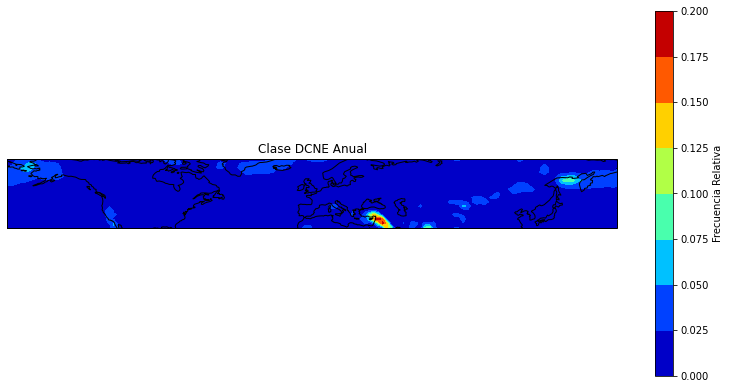

<Figure size 432x288 with 0 Axes>

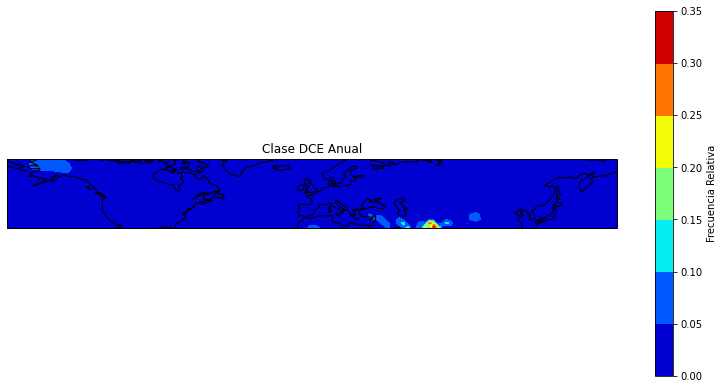

<Figure size 432x288 with 0 Axes>

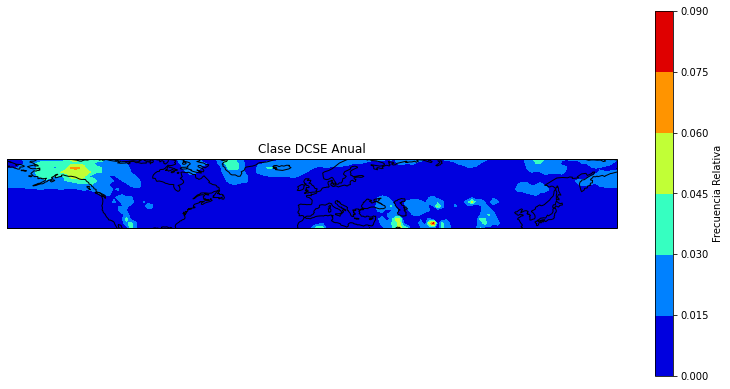

<Figure size 432x288 with 0 Axes>

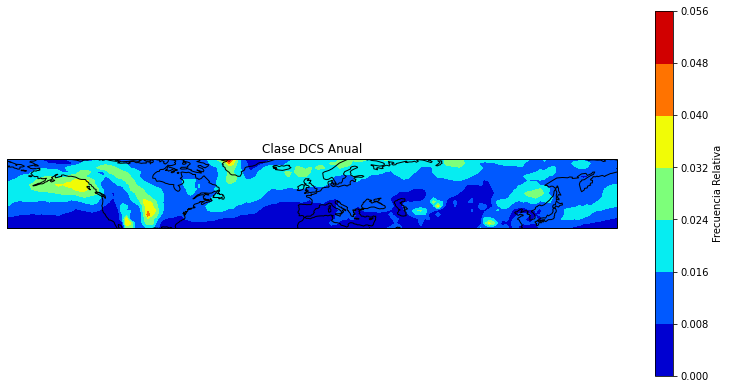

<Figure size 432x288 with 0 Axes>

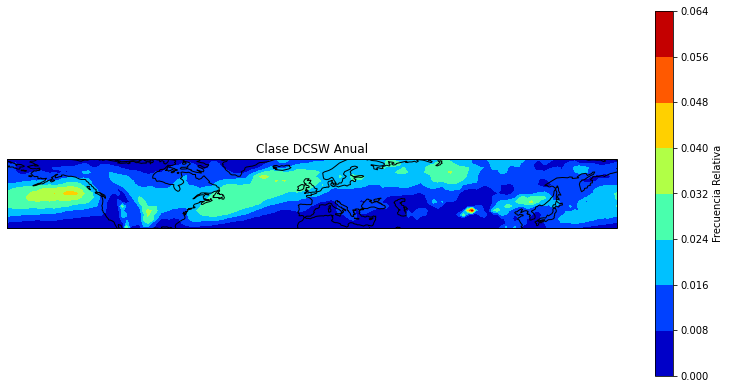

<Figure size 432x288 with 0 Axes>

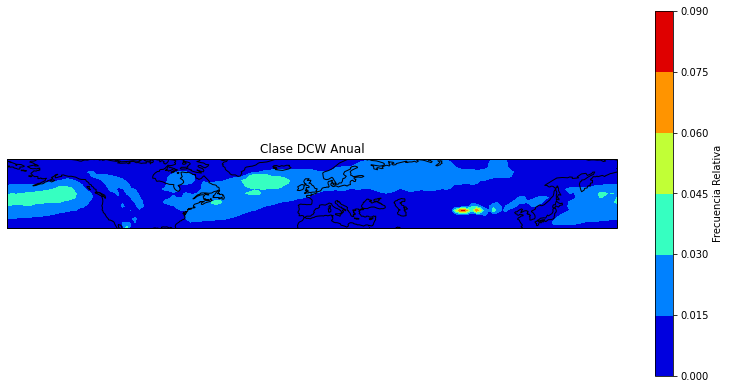

<Figure size 432x288 with 0 Axes>

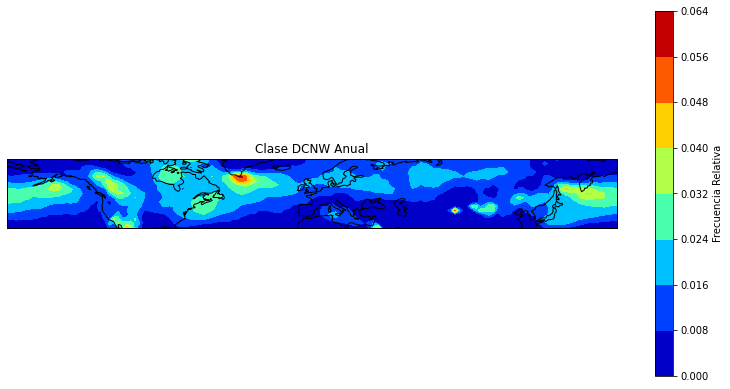

<Figure size 432x288 with 0 Axes>

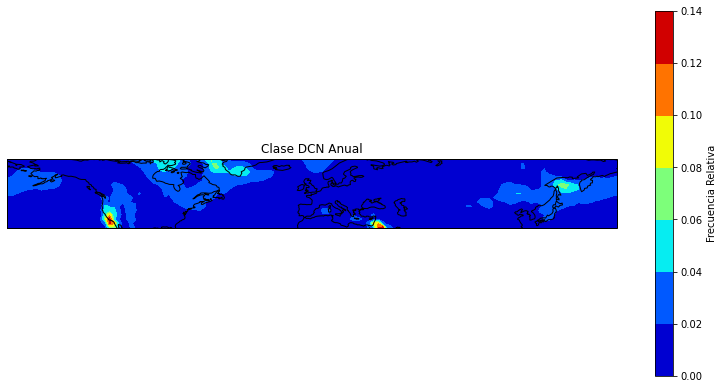

<Figure size 432x288 with 0 Axes>

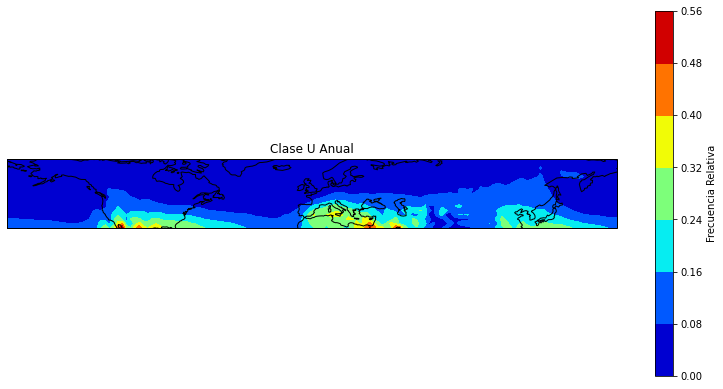

<Figure size 432x288 with 0 Axes>

In [6]:
for i in range(0,dimwt):
    NumClase=i+1
    freq_Clase=datos_freq_relativa.sel(Clase=NumClase)    #DataArray
    labelclase=Tipos[NumClase-1]
    figure=plt.figure(figsize=(1366/100,671/100))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent(extent) #Esto es para que saque el mapa solo de la región escogida
    #ax.set_global() #Esto es para que saque el mapa de todo el mundo
    ax.coastlines()
    b=ax.contourf(lon, lat, freq_Clase, cmap='jet') # colors=['#AAFCFC', '#3EB8F4', '#2A69E5', '#41F5AC', '#2ED423', '#3A8918','#EC5326']   #Con levels=[] ademas puedo poner los niveles en los que se da cada color de los que escojo
    plt.colorbar(b, label='Frecuencia Relativa')
    plt.xlim((-180, 177.5))
    plt.title('Clase '+labelclase+' '+labelperiodotemporal)
    plt.show()
    plt.savefig('frecuencia_relativa_Clase_'+labelclase+'_'+labelperiodotemporal+'.png')
    

datos.close()
